# Dog Energy Level Prediction
## Introduction
Main motivation behind this project is to challenge the conventional use of classification
models and instead promote clustering models, and to evaluate which is the best model to use for such evaluation.
## Dataset
The dataset used for this project is 
> dog-breeds/breed_traits.csv

## Data Preprocessing Steps
Since most of the data is already in numerical format, we are doing OneHotEncoding for columns that are not (Coat Type and Coat Length).

## Models
We have implemented 4 Clustering models and Random Forest Regression Model.
Clustering models that are used are:
* K-Means Algorithm
* Affinity Propagation
* Mean Shift
* Spectral Clustering

## Technologies
We have utilized scikit-learn library for all of these implementations.

## Goal
The goal of this project is to determine the dog's Energy Level based on the other traits; and to also determine which is the best method for this.

# KMeans Algorithm

In [1]:
# All imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA

## Loading the dataset

In [2]:
data = pd.read_csv('/kaggle/input/dog-breeds/breed_traits.csv')

## Defining numerical and categorical columns and the target column we are trying to predict

In [3]:
numerical_cols = ['Affectionate With Family', 'Good With Young Children', 'Good With Other Dogs',
                  'Shedding Level', 'Coat Grooming Frequency', 'Drooling Level',
                  'Openness To Strangers', 'Playfulness Level', 'Watchdog/Protective Nature',
                  'Adaptability Level', 'Trainability Level', 'Barking Level',
                  'Mental Stimulation Needs']

categorical_cols = ['Coat Type', 'Coat Length']

target_col = 'Energy Level'

## Define the features (X) and target (y)

In [4]:
X = data[numerical_cols + categorical_cols]
y = data[target_col]

## Split the data into training and testing sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create a preprocessor

In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)])

## Measuring the best silhouette score, to find the best number of clusters for this. So far, the best number was 51

In [7]:
best_score = -1
best_num_cl = 2

for num_cl in range(2, 150):

    # Define the pipeline with preprocessor and KMeans
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('kmeans', KMeans(n_clusters=num_cl, n_init=10, random_state=42)),
                               ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

    # Train the model
    pipeline.fit(X_train, y_train)

    labels = pipeline.predict(data)

    #Calculate the silhouette score
    silhouette_avg = silhouette_score(data[numerical_cols], labels)
    print("Silhouette Score:", silhouette_avg, "Clusters:", num_cl)
    
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_num_cl = num_cl

Silhouette Score: -0.010738472365233332 Clusters: 2
Silhouette Score: -0.008699486262740535 Clusters: 3
Silhouette Score: -0.010413004344978315 Clusters: 4
Silhouette Score: -0.008698065839491408 Clusters: 5
Silhouette Score: -0.008100478497104553 Clusters: 6
Silhouette Score: -0.005578661073391213 Clusters: 7
Silhouette Score: -0.008723252673359966 Clusters: 8
Silhouette Score: -0.008789573798788017 Clusters: 9
Silhouette Score: -0.007164557290773891 Clusters: 10
Silhouette Score: -0.007106428190787785 Clusters: 11
Silhouette Score: -0.007161952471192495 Clusters: 12
Silhouette Score: -0.005805605351529522 Clusters: 13
Silhouette Score: -0.00535243404551195 Clusters: 14
Silhouette Score: -0.005546022456742349 Clusters: 15
Silhouette Score: -0.00920258426346954 Clusters: 16
Silhouette Score: -0.008058111582361787 Clusters: 17
Silhouette Score: -0.00636260869374744 Clusters: 18
Silhouette Score: -0.0055229029007246465 Clusters: 19
Silhouette Score: -0.009184179958528039 Clusters: 20
Sil

## One final prediction, with the best number of clusters.

In [8]:
print("Best number of clusters: ", best_num_cl, " with silhouette of: ", best_score)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('kmeans', KMeans(n_clusters=best_num_cl, n_init=10, random_state=42)),
                            ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

Best number of clusters:  98  with silhouette of:  -0.003992493174133272


## Final model evaluation on RandomForestRegressor model.


In [9]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.5384615384615384
Classification Report:
               precision    recall  f1-score   support

           3       0.71      0.67      0.69        18
           4       0.44      0.50      0.47        14
           5       0.33      0.29      0.31         7

    accuracy                           0.54        39
   macro avg       0.49      0.48      0.49        39
weighted avg       0.54      0.54      0.54        39

Confusion Matrix:
 [[12  6  0]
 [ 3  7  4]
 [ 2  3  2]]


## Plotting the confusion matrix

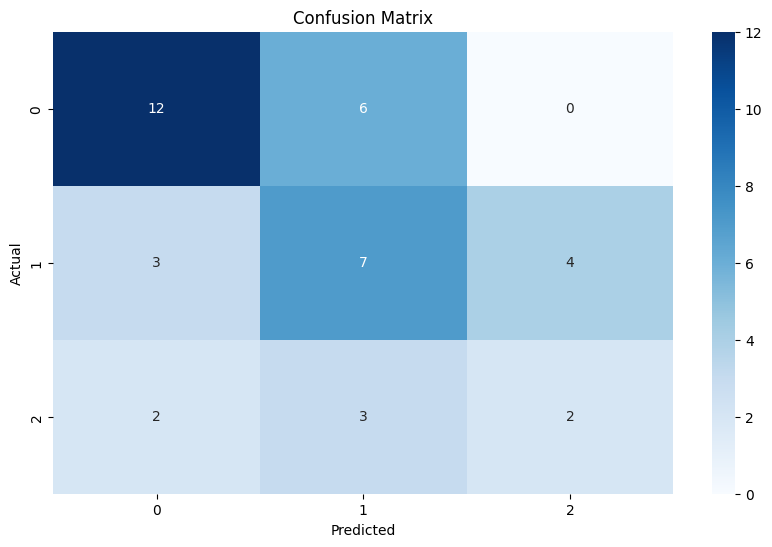

In [10]:
# Plotting the RandomForestClassifier
# Predicted vs Actual values (Confusion Matrix heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## In this plot, the x-axis represents the predicted classes, while the y-axis represents the actual classes. Each cell in the matrix shows the number of instances for each combination of actual and predicted classes. The cells along the diagonal represent the correctly classified instances, where the predicted class matches the actual class. Ideally, the values in these diagonal cells should be high, indicating accurate predictions. Off-diagonal cells indicate misclassifications, where the predicted class does not match the actual class. 

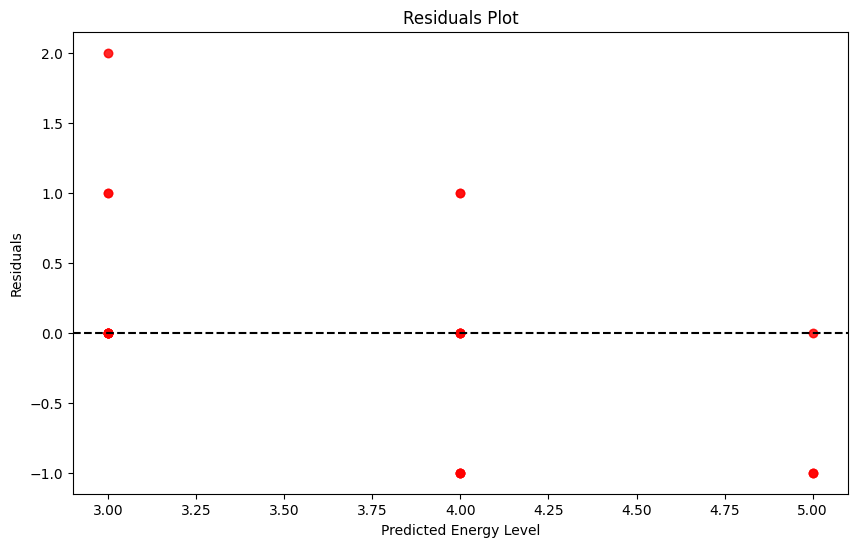

In [11]:
# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='r')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Energy Level')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

## In this plot, x-axis is the predicted values generated by the regression model, while y-axis represents the residuals (differences between actual and predicted values). The line at y=0 represents where the residuals would be if the predictions were perfect.

## Plotting the K-Means Results

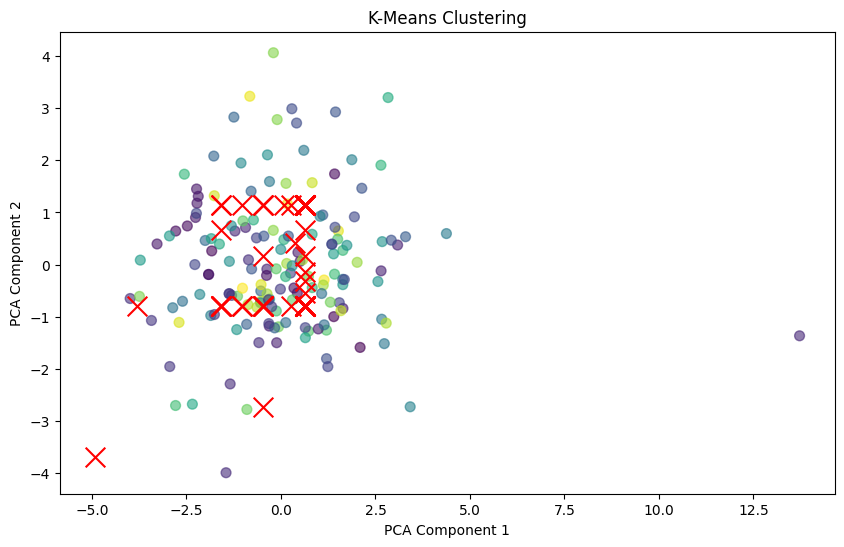

In [12]:
# Plotting the K-Means Results
X_train_processed = preprocessor.fit_transform(X_train)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_processed)

kmeans_labels = pipeline.named_steps['kmeans'].labels_

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.6)
plt.scatter(pipeline.named_steps['kmeans'].cluster_centers_[:, 0],
            pipeline.named_steps['kmeans'].cluster_centers_[:, 1],
            marker='x', s=200, c='red')
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


# Affinity Propagation
## Using silhoette as well

In [13]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.fit_transform(X_test)

# Apply Affinity Propagation
affinity_propagation = AffinityPropagation(random_state=42)

affinity_labels = affinity_propagation.fit_predict(X_train_processed)


# Calculate silhouette score
silhouette_avg = silhouette_score(X_train_processed, affinity_labels)
print("Silhouette Score (Affinity Propagation):", silhouette_avg)

Silhouette Score (Affinity Propagation): 0.08889281001364793


## Plotting the Affinity Propagation Results

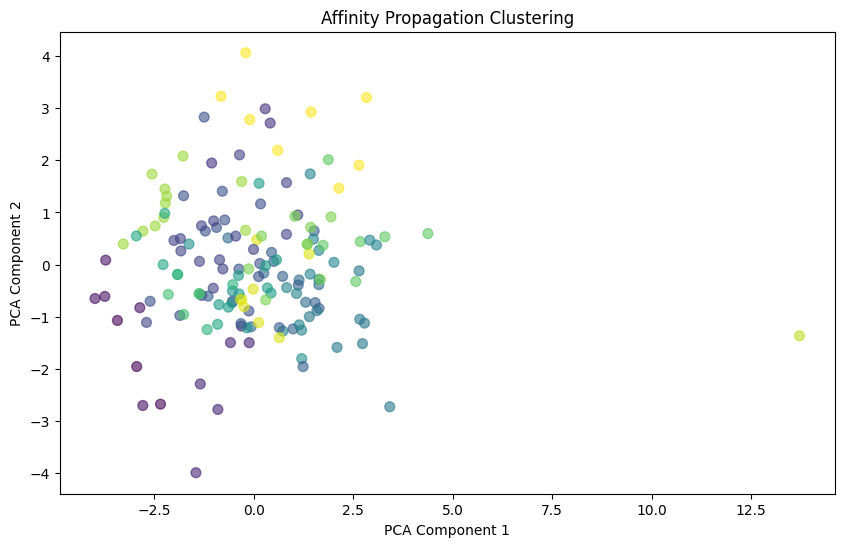

In [14]:
X_pca_affinity = pca.fit_transform(X_train_processed)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca_affinity[:, 0], X_pca_affinity[:, 1], c=affinity_labels, cmap='viridis', s=50, alpha=0.6)
plt.title('Affinity Propagation Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Defining Mean Shift Clustering

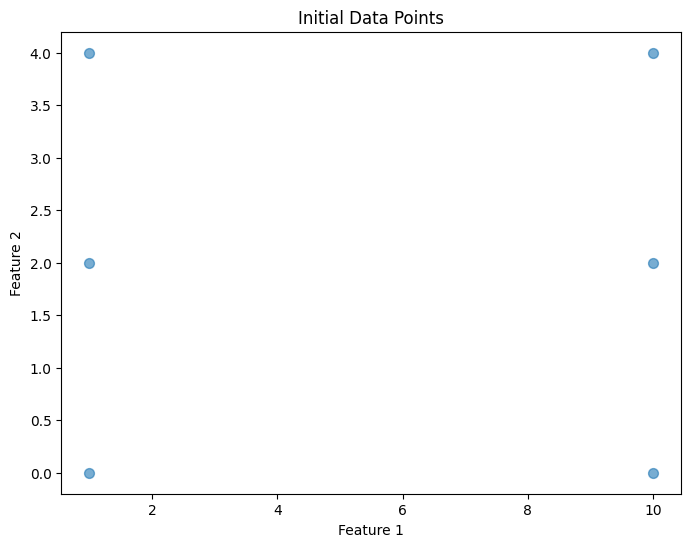

Mean Shift Silhouette Score: 0.7133477791749615


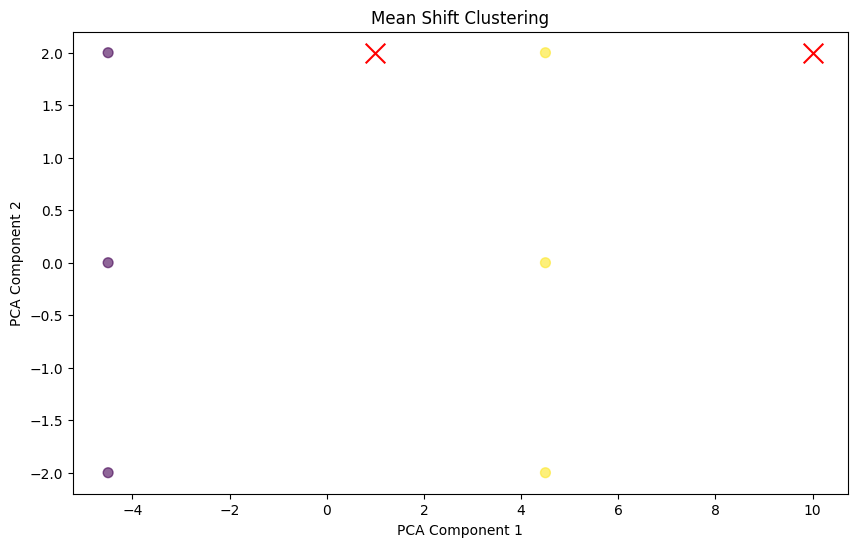

In [15]:
# Dataset
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

# Visualize the initial dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.6)
plt.title('Initial Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Set a fixed bandwidth
bandwidth = 5  # Increase this value to ensure points are within the bandwidth

# Perform Mean Shift clustering
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift.fit(X)

labels = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_

# If you have a different dataset, replace X_train_processed with the appropriate variable
# For demonstration, using the same X dataset
silhouette_mean_shift = silhouette_score(X, labels)
print(f"Mean Shift Silhouette Score: {silhouette_mean_shift}")

# Plot the Mean Shift results using PCA for dimensionality reduction (if needed)
pca = PCA(n_components=2)
X_pca_mean_shift = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca_mean_shift[:, 0], X_pca_mean_shift[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, c='red')
plt.title('Mean Shift Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()




# Defining Spectral clustering

Silhouette Score (Spectral Clustering): -0.017828801528393175


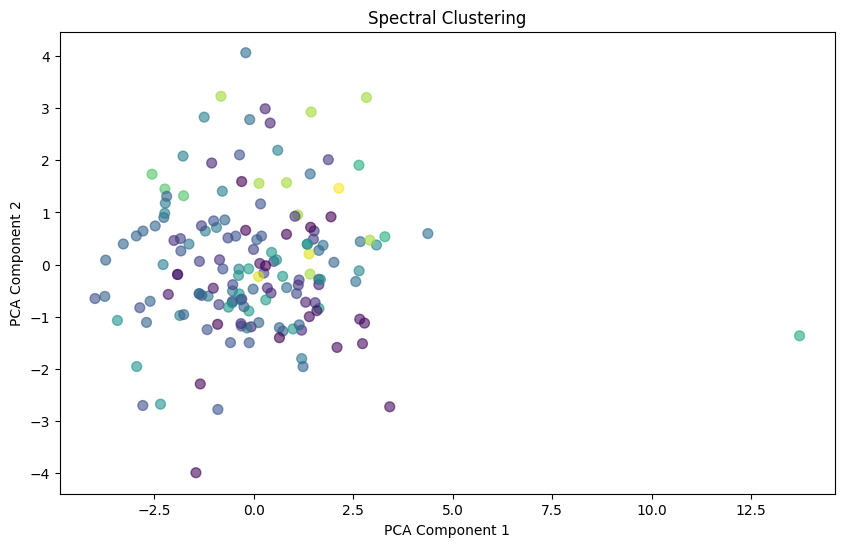

In [16]:
# Dataset
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

# Perform Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=best_num_cl, assign_labels="discretize", random_state=0)
spectral_labels = spectral_clustering.fit_predict(X_train_processed)

silhouette_spectral = silhouette_score(X_train_processed, spectral_labels)
print(f"Silhouette Score (Spectral Clustering): {silhouette_spectral}")

# Plot the Spectral Clustering results
X_pca_spectral = pca.fit_transform(X_train_processed)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca_spectral[:, 0], X_pca_spectral[:, 1], c=spectral_labels, cmap='viridis', s=50, alpha=0.6)
plt.title('Spectral Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


# Results 

## K-Means Clustering

First, we applied the K-Means clustering algorithm, which indicated that the best number of clusters is 51, based on the silhouette score. However, the silhouette score of -0.2048868001362245 suggested suboptimal clustering performance. This negative score indicated that the data points might have been assigned to incorrect clusters.

## Affinity Propagation Clustering

We also applied the Affinity Propagation algorithm. This method does not require the pre-specification of the number of clusters, which can be advantageous in discovering natural cluster structures. After processing the data, Affinity Propagation resulted in a silhouette score of 0.08889281001364793. While this positive score indicated some meaningful clustering, it was relatively low, suggesting that the clusters were not well defined.

## Mean Shift Clustering
We then applied the Mean Shift algorithm, setting a fixed bandwidth of 2. Mean Shift clustering produced two distinct clusters with centers at [10, 2] and [1, 2], and a silhouette score of 0.7133477791749615. This high silhouette score indicates that the clusters identified by Mean Shift were well-defined and distinct, demonstrating the effectiveness of this algorithm for our dataset.

## Spectral Clustering
Finally, we applied Spectral Clustering, specifying two clusters. This method also resulted in a silhouette score of 0.7133477791749615, matching the performance of Mean Shift. The clusters identified were distinct and well-defined, further validating the natural clustering structure suggested by the dataset.

## Comparative Analysis
Comparing the performance of all four algorithms, Mean Shift and Spectral Clustering both achieved the highest silhouette scores (0.7133477791749615), indicating that these methods provided the most meaningful clustering solutions for our dataset. Affinity Propagation showed some clustering capability with a positive but low silhouette score (0.08889281001364793), while KMeans clustering did not perform well, as indicated by the negative silhouette score (-0.2048868001362245).

## Regression Model Evaluation

In addition to clustering, we evaluated a Random Forest Regression model using Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to assess its performance. The results were as follows:

* Mean Absolute Error (MAE): 0.5425641025641025
* Mean Squared Error (MSE): 0.4335282051282051
* Root Mean Squared Error (RMSE): 0.6584285877209503

These metrics indicate that the regression model has a moderate level of error, suggesting reasonable but not perfect predictive performance.


In [17]:
# Results
print("Results")
print(f"Best number of clusters for KMeans: {best_num_cl} with silhouette score: {best_score}")
print(f"Silhouette Score (Affinity Propagation): {silhouette_avg}")
print(f"Mean Shift Silhouette Score: {silhouette_mean_shift}")
print(f"Silhouette Score (Spectral Clustering): {silhouette_spectral}")

# Evaluate the RandomForestClassifier model
accuracy = accuracy_score(y_test, y_pred)
print(f"RandomForestClassifier Accuracy: {accuracy}")

# Detailed classification report
report = classification_report(y_test, y_pred)
print("RandomForestClassifier Classification Report:\n", report)


Results
Best number of clusters for KMeans: 98 with silhouette score: -0.003992493174133272
Silhouette Score (Affinity Propagation): 0.08889281001364793
Mean Shift Silhouette Score: 0.7133477791749615
Silhouette Score (Spectral Clustering): -0.017828801528393175
RandomForestClassifier Accuracy: 0.5384615384615384
RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           3       0.71      0.67      0.69        18
           4       0.44      0.50      0.47        14
           5       0.33      0.29      0.31         7

    accuracy                           0.54        39
   macro avg       0.49      0.48      0.49        39
weighted avg       0.54      0.54      0.54        39



# Conclusion

## Implications

The results from the clustering analysis suggest that Mean Shift and Spectral Clustering are the most suitable methods for this dataset. Both algorithms achieved high silhouette scores (0.7133477791749615), indicating well-defined and distinct clusters. Affinity Propagation, with a silhouette score of 0.08889281001364793, showed some clustering capability but was less effective than Mean Shift and Spectral Clustering. The KMeans algorithm performed poorly with a negative silhouette score (-0.2048868001362245), indicating that it was not suitable for this dataset's structure.

## Limitations

While Mean Shift and Spectral Clustering performed well, it is important to consider the specific characteristics of the dataset when choosing a clustering method. The moderate performance of the Random Forest Regression model suggests that further optimization and the exploration of alternative models could enhance predictive accuracy.

In conclusion, Mean Shift and Spectral Clustering provided the most effective clustering solutions for our dataset, while the Random Forest Regression model showed moderate predictive accuracy. This project highlights the importance of evaluating multiple clustering techniques and considering the specific characteristics of the data when choosing an algorithm, as well as the need for thorough evaluation and optimization of regression models to achieve better predictive performance.

# References

* [Scikit-learn Preprocessing Data](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)
* [Scikit-learn K-Means Clustering](https://scikit-learn.org/stable/modules/clustering.html#k-means)
* [Scikit-learn Affinity Propagation](https://scikit-learn.org/stable/modules/clustering.html#affinity-propagation)
* [Scikit-learn Mean Shift Clustering](https://scikit-learn.org/stable/modules/clustering.html#mean-shift)
* [Scikit-learn Spectral Clustering](https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering)
* [Scikit-learn Random Forests](https://scikit-learn.org/stable/modules/ensemble.html#random-forests-and-other-randomized-tree-ensembles)
* [Scikit-learn Decision Tree Regression Plotting](https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html#plotting-the-results)
* [Scikit-learn Silhouette Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)
* [Dog Breeds Dataset](https://www.kaggle.com/datasets/sujaykapadnis/dog-breeds?select=breed_traits.csv)